In [1]:
#Importing all the required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound as play
%matplotlib inline

In [2]:
#Previously used functions

# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=100, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft
# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft


# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None, complex_part=False):
    plt.rcParams['figure.figsize'] = [10, 4] #Setting the plotting area
    
    if complex_part:                         #For complex signals
        fig, ax = plt.subplots(2,2)

        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        #Plotting the real part
        ax[0, 0].title.set_text('Real Part')
        ax[0, 0].stem(dtft['omega'], np.real(dtft['complex']),use_line_collection=True)
        ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')
        #Plotting the Imaginary part
        ax[0, 1].title.set_text('Imaginary Part')
        ax[0, 1].stem(dtft['omega'], np.imag(dtft['complex']), 'tab:red',use_line_collection=True)
        ax[0, 1].yaxis.tick_right()
        ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')
        #Plotting the Magnitude of DTFT
        ax[1, 0].title.set_text('Magnitude')
        ax[1, 0].stem(dtft['omega'], dtft['magnitude'], 'tab:orange',use_line_collection=True)
        ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')
        #Plotting the Phase of DTFT
        ax[1, 1].title.set_text('Phase')
        ax[1, 1].stem(dtft['omega'], dtft['phase'], 'tab:green',use_line_collection=True)
        ax[1, 1].yaxis.tick_right()        
        ax[1, 1].set(ylabel='$\phi$')
    else:                                   #For Real signal
        #Plotting the Magnitude of DTFT
        fig, (ax1, ax2) = plt.subplots(1, 2)
        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        ax1.stem(dtft['omega'],dtft['magnitude'],use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
        ax1.title.set_text('Magnitude')
        #Plotting the Phase of DTFT
        ax2.stem(dtft['omega'],dtft['phase'], 'tab:green',use_line_collection=True)
        ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
        ax2.title.set_text('Phase')
        
        
#This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0, time_len=None, normalise=False):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    fr = params[2]
    if time_len != None:
        nframes = int(time_len*fr)
    else:
        nframes = params[3]
    audio_frame = audio_file.readframes(nframes)        #Reading all frames of the audio file 
    audio = np.zeros(nframes)                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array

    duration = nframes/fr                 #Time duration of the signal
    #Normalising the wave amplitude
    if normalise:
        audio = audio/2**7 - 1
    #Printing all the parameters of the wave
    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', fr, '\bHz', ', Frames=', nframes, '\nDuration:', time_len if time_len else 
              duration, '\bs\n')
    return audio, duration, nframes, fr

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file, normalise, time_len=None, verbose=0):
    #Reading the wave file, and converting to array
    audio, t, frames, _ = wavfile_to_nparray(file, verbose=verbose, time_len=time_len, normalise=normalise)
    time = np.linspace(0, t, frames)          #Time scale
    
    dtft_audio = dtft(audio, N=200)           #Finding the DTFT of the wave file
    
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.stem(dtft_audio['omega'], dtft_audio['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(dtft_audio['omega'], dtft_audio['phase'], 'tab:red',use_line_collection=True)
#     dtft_plotter(dtft_audio)


#Function for doing convolution
#Method adopted : Shift and Overlap; Moving window-h
def convolve(x, h, plot=True):
    n  =  x.shape[0]#Finding the length of the x input
    m = h.shape[0]#Finding the length of the impulse function
    #print("x[n]: ", x)#Input Sequence
    #print("h[n]: ", h)#Impulse response
    h = np.flip(h)#Flipping the impulse response
    pads = np.zeros(m-1)#Padding for the input array for calculation purpose
    x =  np.hstack((pads, x, pads))#Padding the input signal at the start and end
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])#Summing the overlapped region

    #print("y[n] = x[n]*h[n]: ", y)#Output sequence
    #Plot
    if plot:
        l = 15 #Range of plot
        n = np.linspace(-1*l, l, 2*l+1)#n-x-axis
        x = np.hstack((np.zeros(l), x, np.zeros(l+1-x.shape[0])))#input sequence with padded zeros
        h = np.hstack((np.zeros(l), h, np.zeros(l+1-h.shape[0])))#Impulse sequence with padded zeros
        y = np.hstack((np.zeros(l), y, np.zeros(l+1-y.shape[0])))#output sequence with padded zeros

        plt.rcParams['figure.figsize'] = [10, 4]#Setting the plot area
        plt.rc('axes', labelsize=12)#Setting the label siz
        #Plot of Input sequence
        fig, (ax1,ax2) = plt.subplots(1, 2)
        ax1.stem(n, x,use_line_collection=True)
        #Plot of impulse response
        ax1.set(xlabel='n', ylabel='x[n]')
        ax2.stem(n, h,use_line_collection=True)
        ax2.set(xlabel='n', ylabel='h[n]')
        #Plot of output sequence
        plt.figure()
        plt.stem(n, y,use_line_collection=True)
        plt.xlabel('n')
        plt.ylabel('y[n]')
    
    return y

#Function which convolves the data from a wave file and creates a new wave file with
#data resulting from the convolution of original signals data and given impulse response
def audio_convolve(i, h, normalisation, o, time_len=None):
    #Reading and extracting data from the original signal  
    x, t, nframes, fr = wavfile_to_nparray(i, time_len=time_len, normalise=normalisation)    
    #Creating the newfile
    y_file = o
    y_filep = wave.open(y_file, 'wb')
    #Setting the wave file parameters
    y_filep.setnchannels(1)
    y_filep.setsampwidth(1)
    y_filep.setframerate(fr)
    #Finding the convolution data 
    y = convolve(x, h, plot=False)
    #Normalising the data 
    if normalisation:
        y = np.clip(y, -1, 1)
        y = (y+1)*(2**7)
    else:
        y = np.clip(y, 0, 255)
    #Converting the byte code to nparray
    y = y.astype(np.uint8)
    y = y.tobytes()
    y_filep.writeframesraw(y)#Writing the new framesdata
    y_filep.close()#Closing the wave file
    return y_file


#Function for plotting the impulse responses

def impulse_plot(n,h,prop=True):
    H = dtft(h)                               #Finding the DTFT of the impulse response
    #For plotting the impulse response
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    plt.figure()                                            #Plotting Time signal
    plt.title('Impulse Response', fontsize='large', fontweight='bold')
    plt.stem(n,h,use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('h[n]')

    if prop == True:  
    #Plotting Magnitude and Phase
        fig, (ax1, ax2) = plt.subplots(1,2)
        plt.suptitle("DTFT of h[n]")
        ax1.title.set_text('Magnitude')
        ax1.stem(H['omega'], H['magnitude'],use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$|H(e^{j \omega})|$')

        ax2.title.set_text('Phase')
        ax2.set(xlabel='$\omega$', ylabel='$\phi$')
        ax2.stem(H['omega'], H['phase'], 'tab:red',use_line_collection=True)

#Function for group delay
#Group delay function
def grd(Phase):
    num = len(Phase)
    dw = 2*np.pi/num
    gd = np.zeros(num-1)
    for i in range(num-1):
        gd[i] = (Phase[i]-Phase[i+1])/dw
        if gd[i]>10 or gd[i]<-10:
            gd[i]=0
    return gd


#Function for plotting group delay for given h[n]
def impulse_grd(n,h):
    H = dtft(h,low_lim=0,high_lim=2*np.pi) 
    gd = grd(H['phase'])
    w = np.linspace(0,2*np.pi,len(H['phase'])) #w - range
    #For plotting the impulse response
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    plt.figure()                                            #Plotting Group Delay
    plt.title('Group Delay', fontsize='large', fontweight='bold')
    plt.stem(w[0:len(gd)],gd,use_line_collection=True)
    plt.xlabel('$\omega$')
    plt.ylabel('$grd(H(e^{j \omega}))$')

    #                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of h[n]")
    ax1.title.set_text('Magnitude')
    ax1.stem(H['omega'], H['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|H(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(H['omega'], H['phase'], 'tab:red',use_line_collection=True)

    
#Function for finding Phase Spectrum,Magnitude spectrum, and group delay
def analyse_lti(a,b,num = 100,plot = True): #Sequences of ak,bk & num is Number of datapoints in w
    w = np.linspace(-np.pi,np.pi,num) #w - range
    e = np.exp(-1j*w)   # e^-jw
    numr = np.zeros(len(w))*1j
    denmr = np.zeros(len(w))*1j
    for m in range(len(b)): # Calculating numerator sum
        z = e**m
        numr += b[m]*z
    for k in range(len(a)):#Calculating denominator sum
        z = e**k
        denmr += a[k]*z
    H = numr/denmr      #H(e^jw)
    Mag = abs(H)        #|H(e^jw)|
    Phase = np.angle(H) #phase<H(e^jw)>
    #print(len(Phase))
    #Group delay
    gr_d = grd(Phase)
    #Plot
    if plot:
        #For plotting the impulse response
        plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
        plt.rc('axes', labelsize=12)              #Setting the labels size
        plt.figure()                              #Plotting Magnitude
        plt.title('Magnitude', fontsize='large', fontweight='bold')
        plt.stem(w,20*np.log10(Mag),use_line_collection=True)
        plt.xlabel('$\omega$')
        plt.ylabel('$20log|H(e^{j \omega})|$')

        #                                                             #Plotting Group delay and Phase
        fig, (ax1, ax2) = plt.subplots(1,2)
        plt.suptitle("Phase parameters of $H(e^{j \omega})$ ")
        ax1.title.set_text('Group Delay')
        ax1.stem(w[0:num-1], gr_d,use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$grd(H(e^{j \omega}))$')
        ax2.title.set_text('Phase ')
        ax2.set(xlabel='$\omega$', ylabel='$Phase(\phi)$')
        ax2.stem(w, Phase, 'tab:red',use_line_collection=True)




$\textbf{Problem-1}$ :  Given distorting FIR system : H(z) = $(1−0.9e^{j0.6π}z^{−1})(1−0.9e^{−j0.6π}z^{−1})(1−1.25e^{j0.8π}z^{−1})(1−1.25e^{−j0.8π}z^{−1})$. Choose your favorite signal (speech or otherwise) and apply the filter to it. Plot or playback the input and output signals x[n] and y[n] = h[n] ∗ x[n].

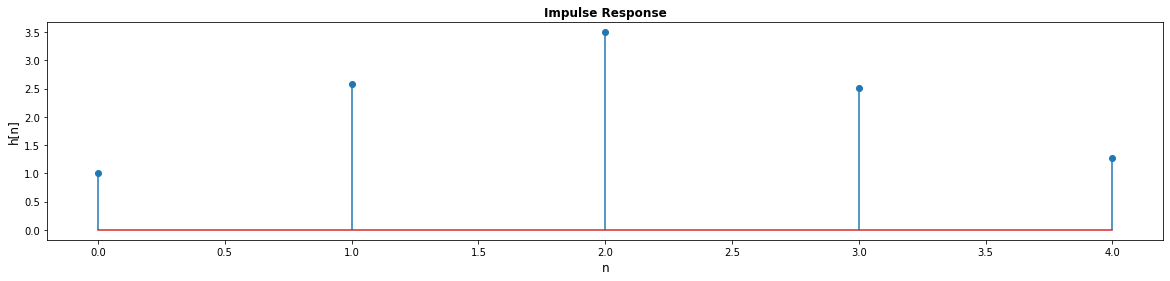

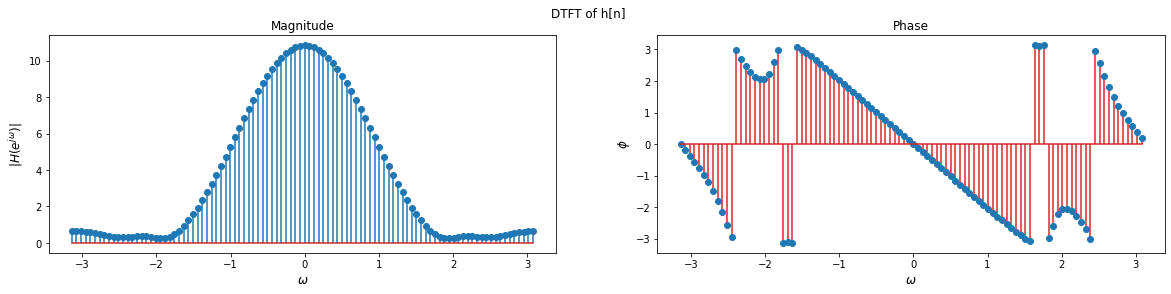

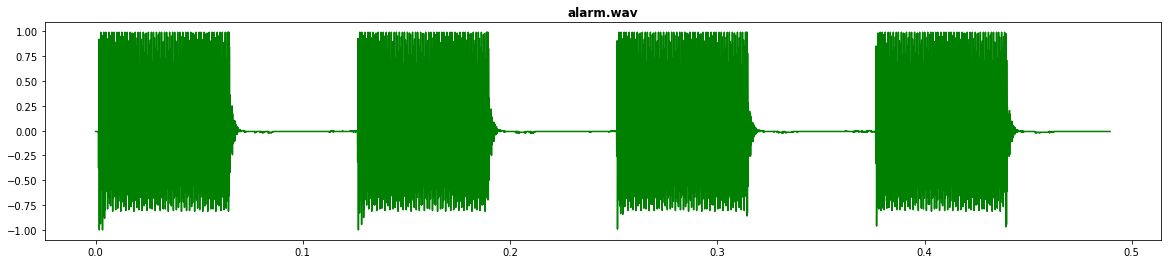

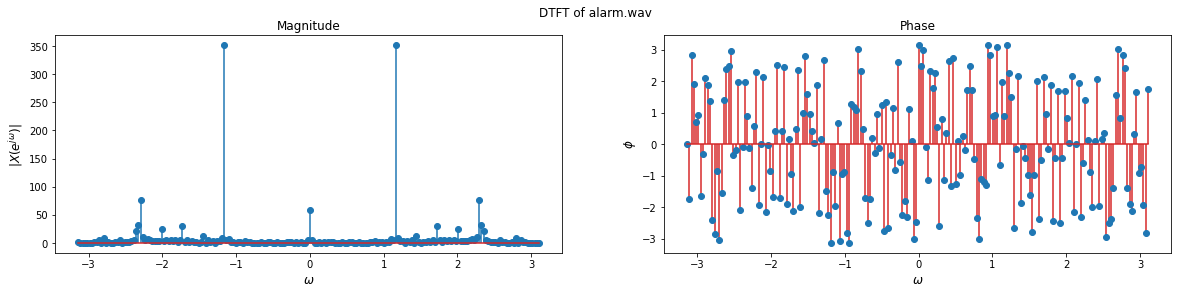

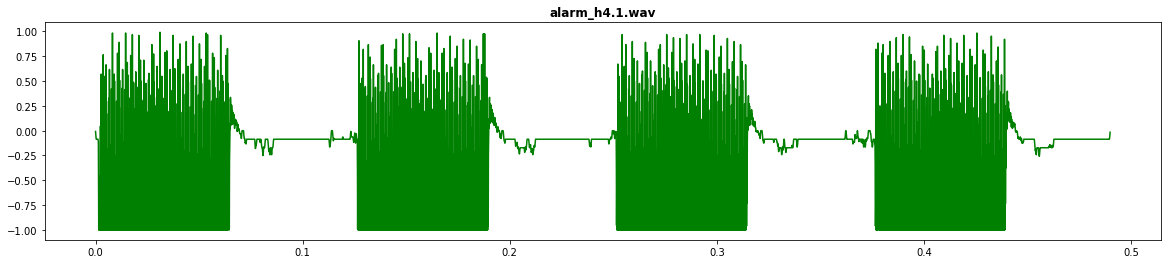

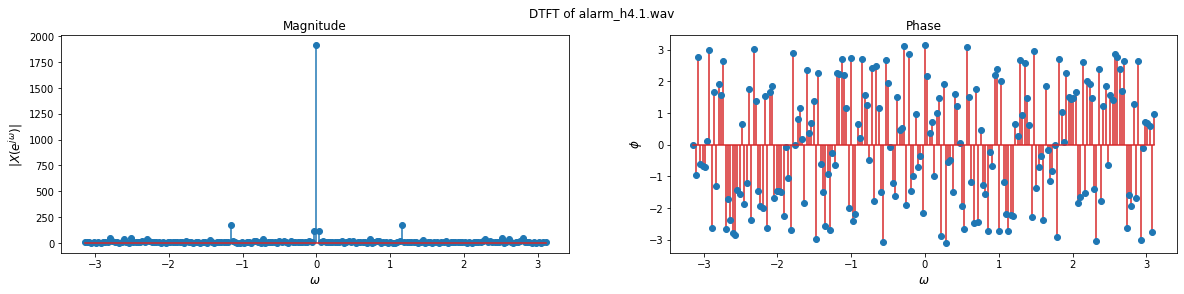

In [3]:
#Given H(z) = 1.26563 z^-4 + 2.50737 z^-3 + 3.4975 z^-2 + 2.57877 z^-1 + 1 on applying inverse fourier transform gives as
#h[n] = 1.26563 del(n-4) + 2.50737 del(n-3) + 3.4975 del(n-2) + 2.57877 del(n-1) + del(n)
h = np.array([ 1, 2.57877, 3.4975, 2.50737, 1.26563])
n = np.array([ 0, 1, 2, 3, 4])
impulse_plot(n,h)
#selecting the input wav file
string = ["alarm","cry","wow","armageddon"]
#i = np.random.randint(0,4)
i = 0
file = string[i]+".wav"
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=True, o=file[:-4] + "_h4.1.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile


$\textbf{Problem-2}$ : We also found the inverse system for the minimum phase factor of H(z). Call the inverse system of the minimum
phase factor G(z). Now find $\hat{x}[n]$ = g[n] ∗ y[n] and plot it or play it back. How effective is the inverse system in
undoing the effect of the distorting system? Illustrate this using the magnitude and phase spectra of x[n] and $\hat{x}[n]$.


We found 

\begin{align}
G(z) = \frac{1}{H_{min}(z)}
\end{align}
\begin{align}
\implies G(z) = \frac{1}{(1.25)^2(1-0.9e^{j0.6\pi}z^{-1})(1-0.9e^{-j0.6\pi}z^{-1})(1-0.8e^{j0.8\pi}z^{-1})(1-0.8e^{-j0.8\pi}z^{-1})}
\end{align}
Let
\begin{align}
G(z) = \frac{A}{(1-0.9e^{j0.6\pi}z^{-1})}+\frac{B}{(1-0.9e^{-j0.6\pi}z^{-1})}+\frac{C}{(1-0.8^{j0.8\pi}z^{-1})}+\frac{D}{(1-0.8e^{-j0.8\pi}z^{-1})}
\end{align}

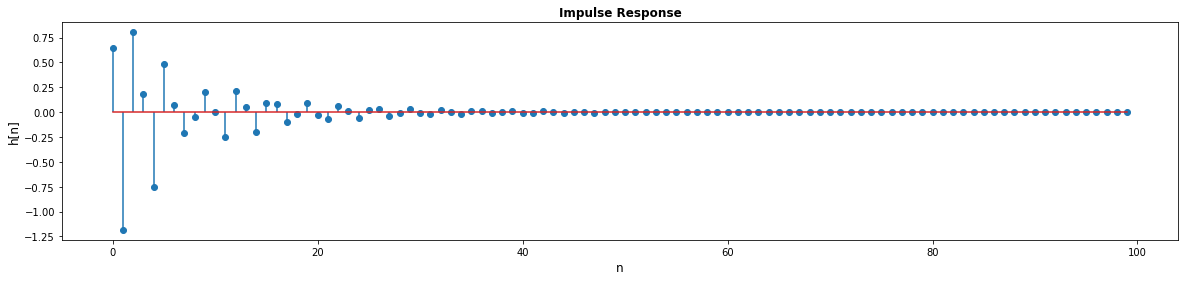

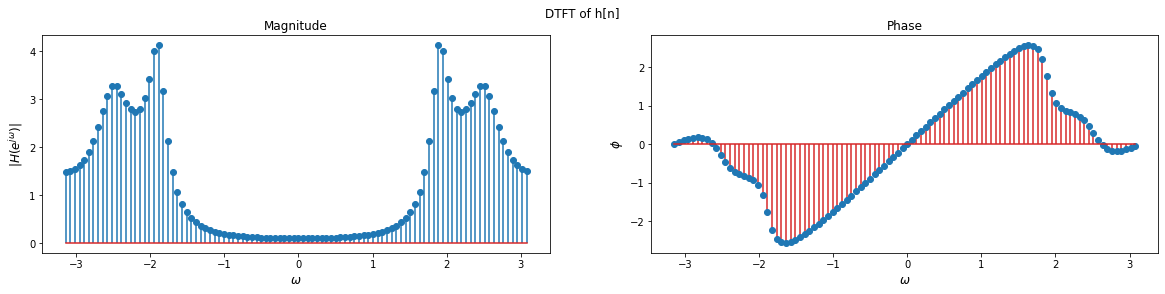

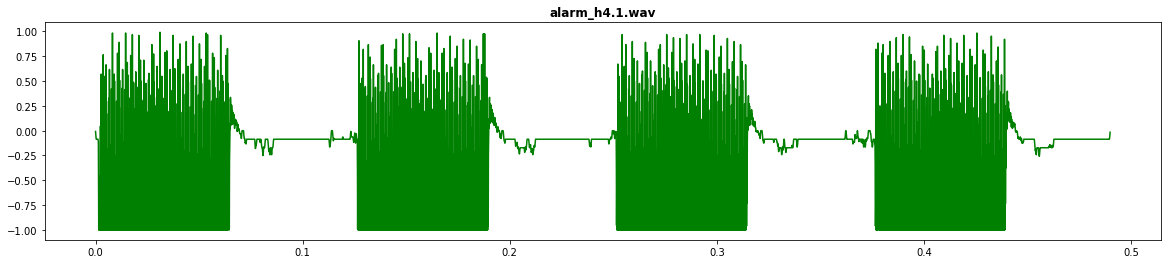

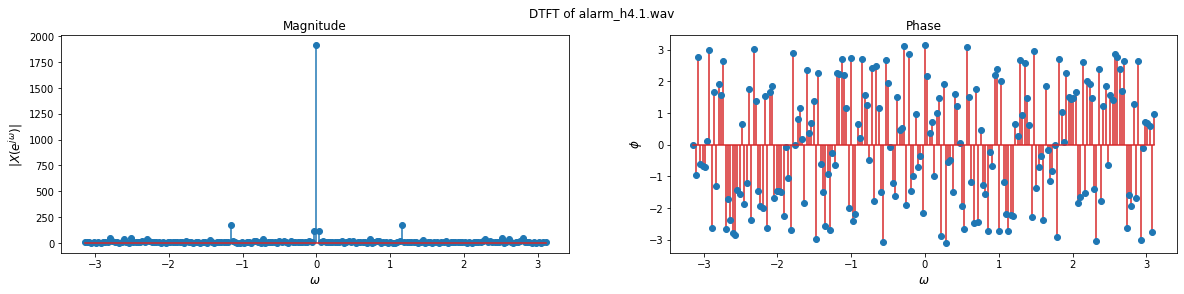

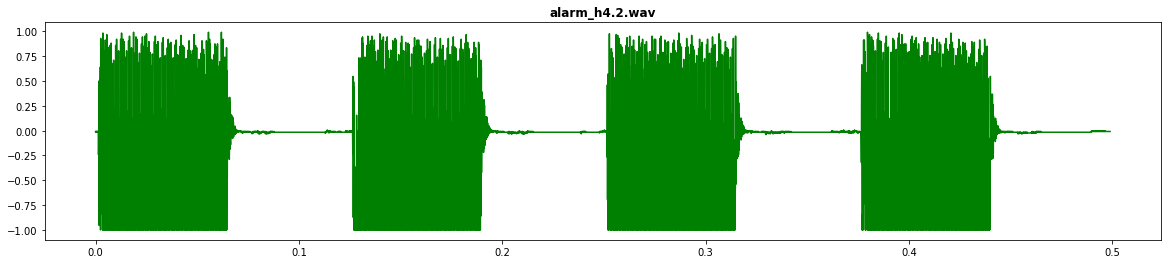

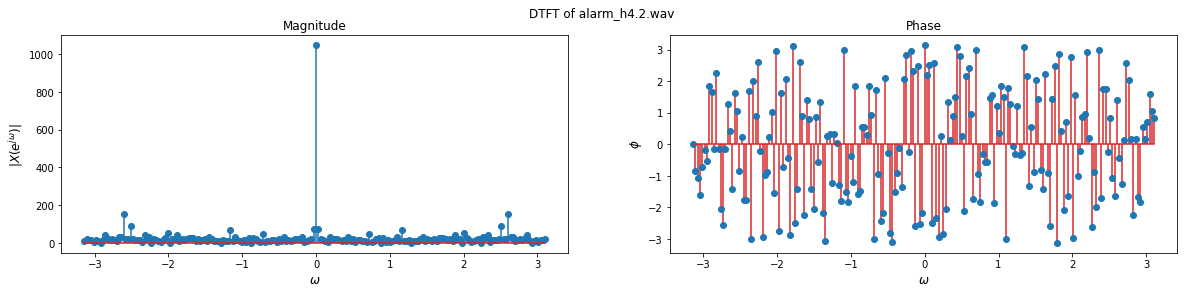

In [4]:
#Calculating coefficients
#G(z)=1/((1-(0.9*np.exp(1j*0.6*np.pi)/z))*(1-(0.9*np.exp(-1j*0.6*np.pi)/z))*(1-(0.8*np.exp(1j*0.8*np.pi)/z))*(1-(0.8*np.exp(-1j*0.8*np.pi)/z)))
z = 0.9*np.exp(1j*0.6*np.pi)
A = 1/((1.25**2)*(1-(0.9*np.exp(-1j*0.6*np.pi)/z))*(1-(0.8*np.exp(1j*0.8*np.pi)/z))*(1-(0.8*np.exp(-1j*0.8*np.pi)/z)))
z = 0.9*np.exp(-1j*0.6*np.pi)
B = 1/((1.25**2)*(1-(0.9*np.exp(1j*0.6*np.pi)/z))*(1-(0.8*np.exp(1j*0.8*np.pi)/z))*(1-(0.8*np.exp(-1j*0.8*np.pi)/z)))
z = 0.8*np.exp(1j*0.8*np.pi)
C = 1/((1.25**2)*(1-(0.9*np.exp(1j*0.6*np.pi)/z))*(1-(0.9*np.exp(-1j*0.6*np.pi)/z))*(1-(0.8*np.exp(-1j*0.8*np.pi)/z)))
z = 0.8*np.exp(-1j*0.8*np.pi)
D = 1/((1.25**2)*(1-(0.9*np.exp(1j*0.6*np.pi)/z))*(1-(0.9*np.exp(-1j*0.6*np.pi)/z))*(1-(0.8*np.exp(1j*0.8*np.pi)/z)))
#Finding g[n]
n = np.arange(100)
g = A*(0.9*np.exp(1j*0.6*np.pi))**n + B*(0.9*np.exp(-1j*0.6*np.pi))**n + C*(0.8*np.exp(1j*0.8*np.pi))**n + D*(0.8*np.exp(-1j*0.8*np.pi))**n
g_real = np.real(g)#Imaginary part is coming beacuase of the truncation
impulse_plot(n,g_real)
#Previous file operated on
file_new = file[:-4] + "_h4.1.wav"
#Getting the convolved wave file
op = audio_convolve(file_new, g_real, normalisation=True, o=file_new[:-9] + "_h4.2.wav")
#Previously operated wave file
play(file_new)#Playing the original wave file
analyise_wav_file(file_new, normalise=True)#Analysing the wavefile
#Operated on operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile

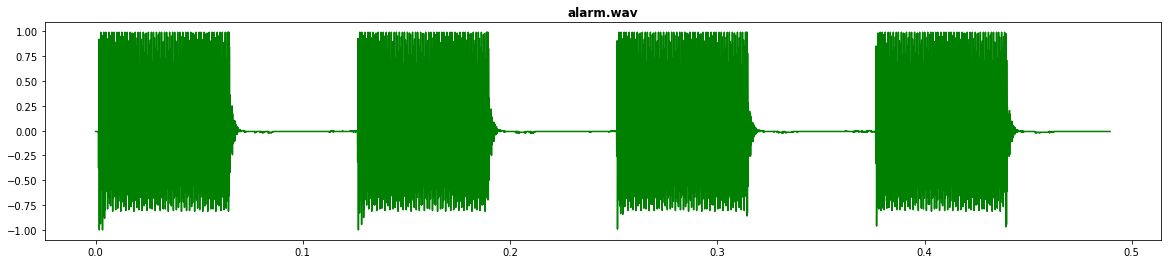

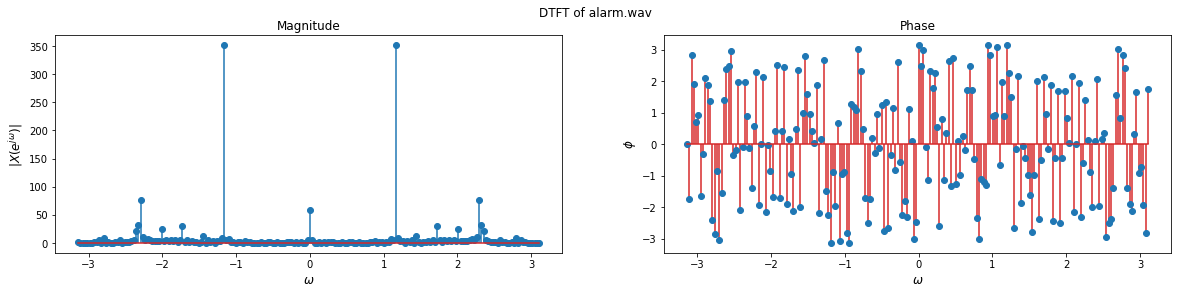

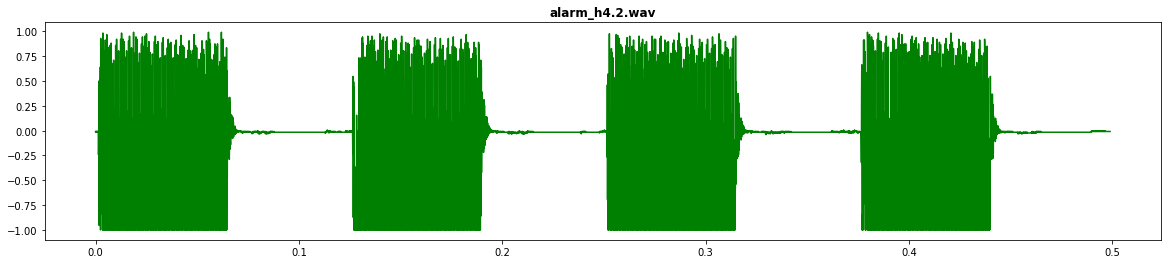

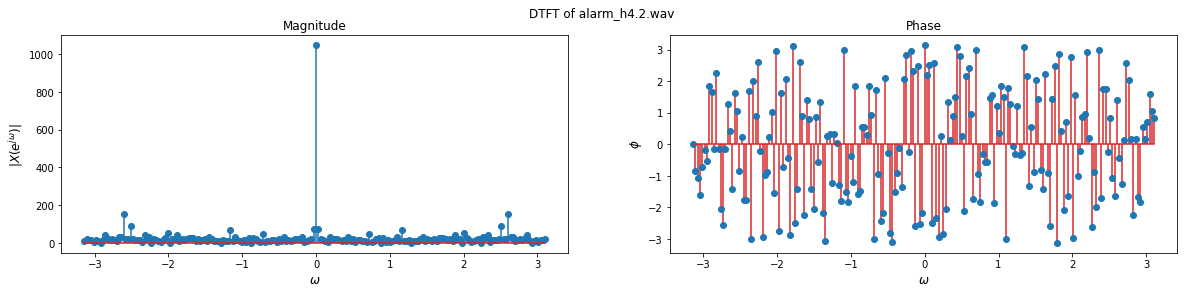

In [5]:
#Original Wave file
play(file)#Playing the wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Recovered wave file
play(op)#Playing the recovered wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile

$\textbf{Observations :}$

1. As seen that the extracted signal is still very different from the original signal.
2. The Magnitude of the recovered signal has similar but a scaled response of that of original signal. This might be happening because of the computational inaccuracy which results in ths scaling.
3. Phase of the recovered signal is very much different from the original signal.

$\textbf{Problem-3} : $ Using the code you wrote in the previous assignment, plot the magnitude spectrum, phase spectrum and the group
delay for the following FIR systems for 0 ≤ ω < 2π:

(a) h[n] = u[n] − u[n − 5]. 

(b) h[n] = u[n] − u[n − 6]. 

(c) h[n] = δ[n] − δ[n − 2]. 

(d) h[n] = δ[n] − δ[n − 1]. 

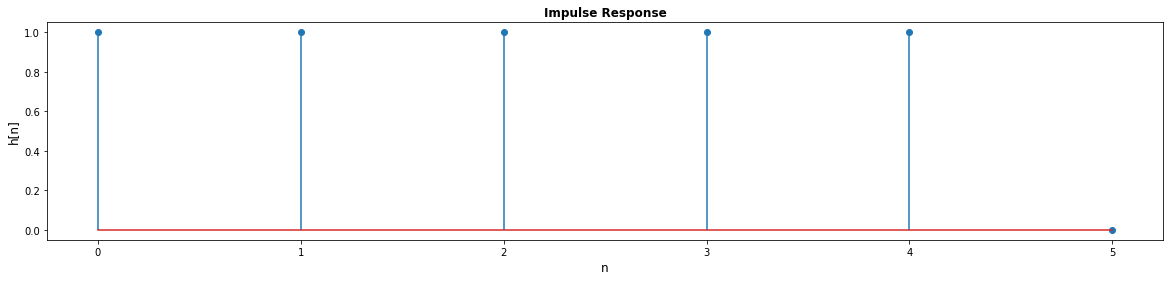

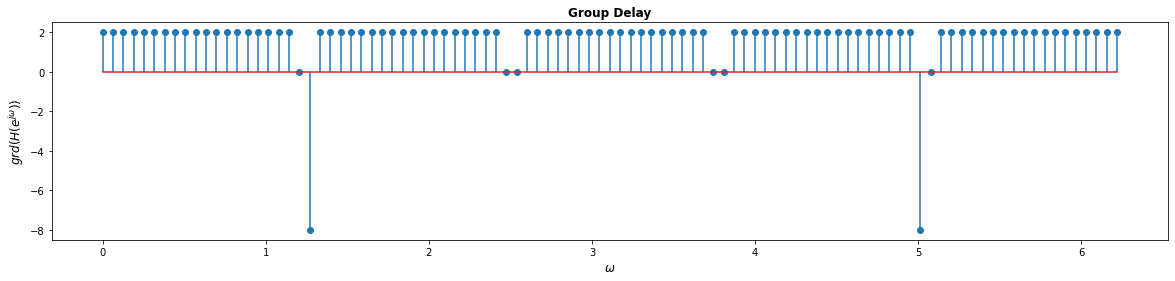

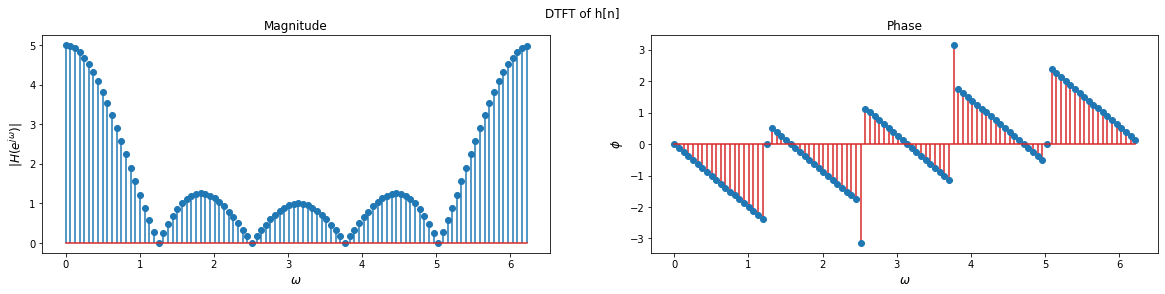

In [6]:
ha = np.array([1,1,1,1,1,0])
na = np.arange(len(ha))
impulse_plot(na,ha,prop=False)
impulse_grd(na,ha)

Group delay here is 2 , which implies there will be 2 unit shift in the operated signal.

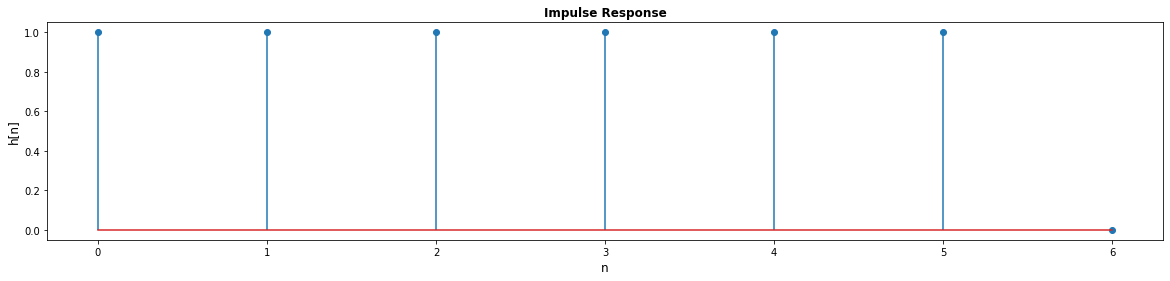

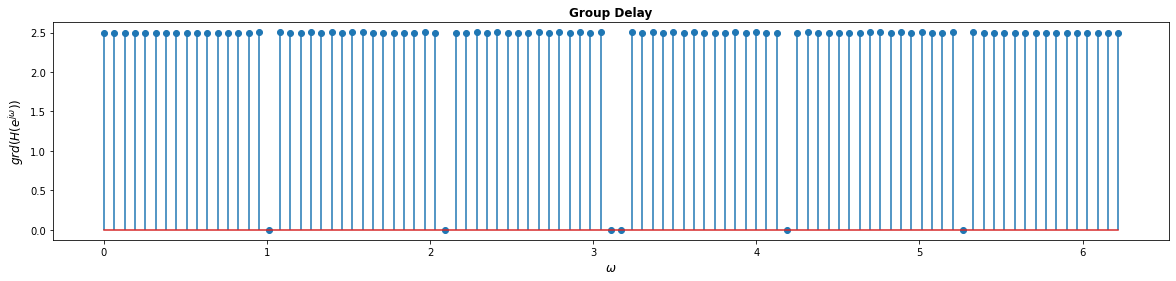

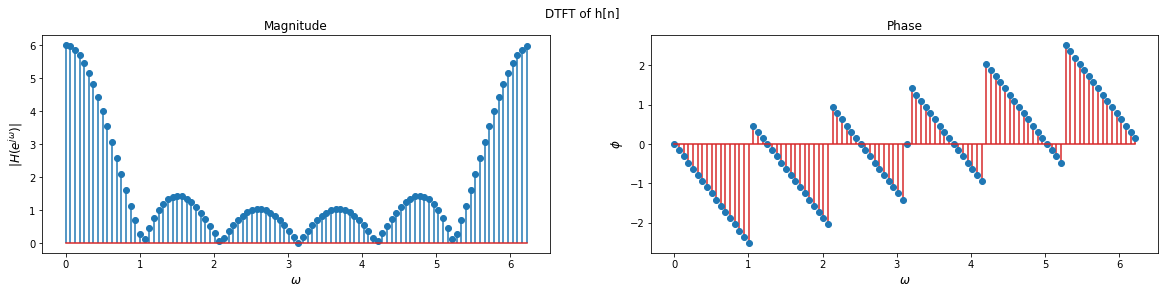

In [7]:
hb = np.array([1,1,1,1,1,1,0])
nb = np.arange(len(hb))
impulse_plot(nb,hb,prop=False)
impulse_grd(nb,hb)

Group delay here is 2.5, hence the signal would be shifted by 2 units nearly , and in some places the grd is made to zero intentionally to overcome the effect of the limited range of arctan().

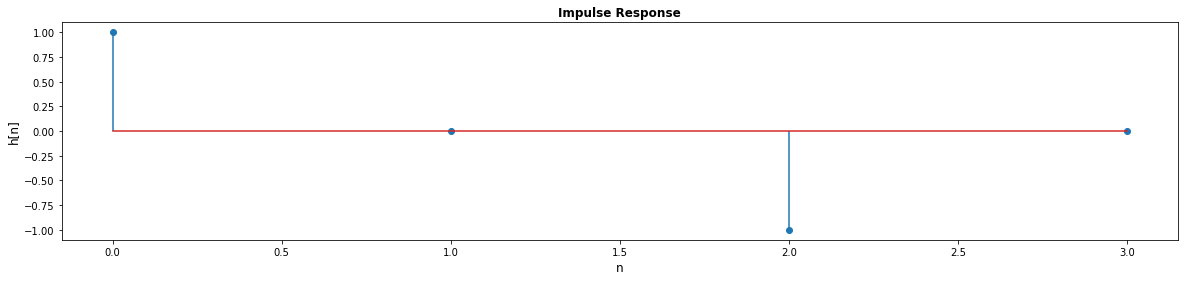

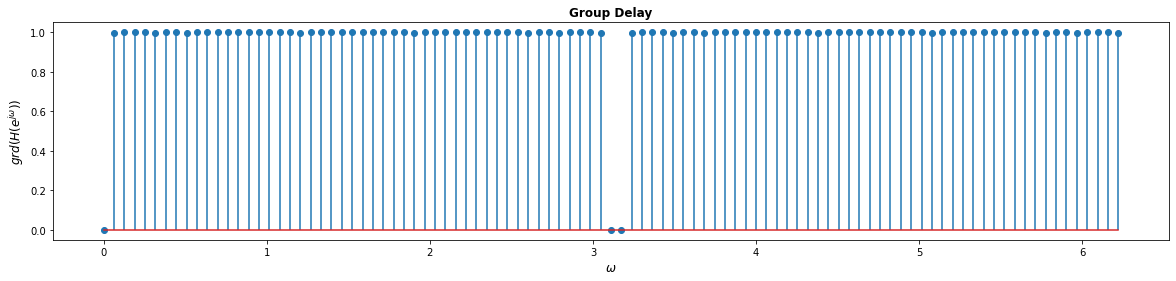

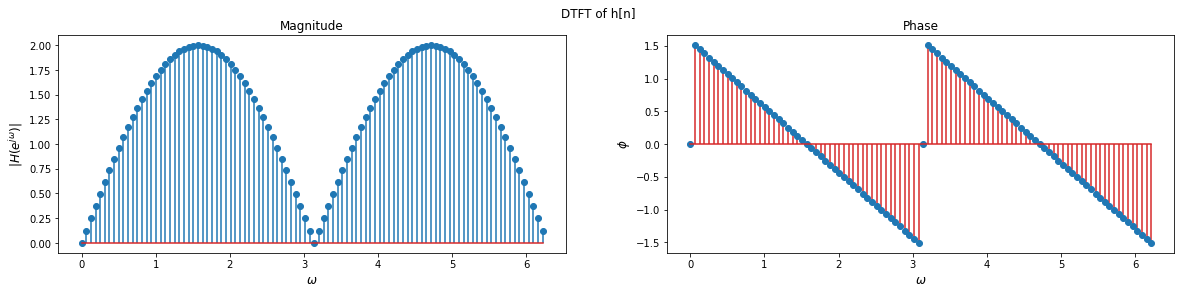

In [8]:
hc = np.array([1,0,-1,0])
nc = np.arange(len(hc))
impulse_plot(nc,hc,prop=False)
impulse_grd(nc,hc)

Group delay here is 1, hence the signal would be shifted by 1 unit nearly , and in some places the grd is made to zero intentionally to overcome the effect of the limited range of arctan().

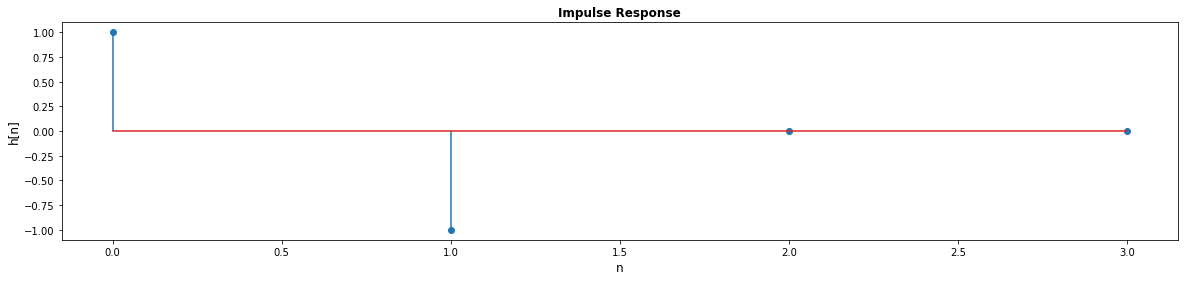

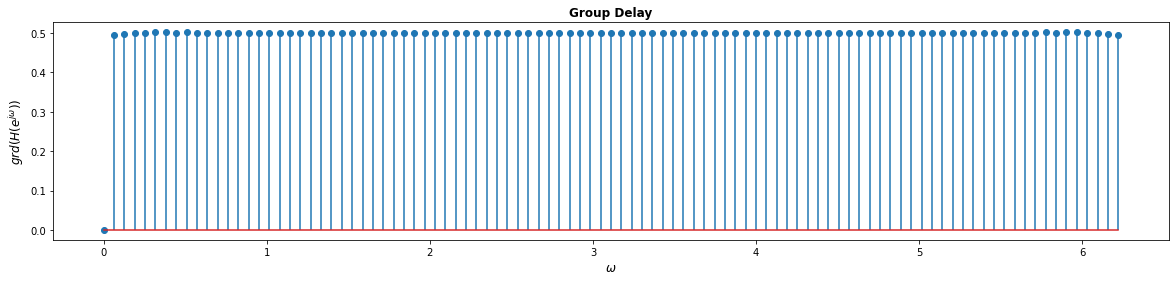

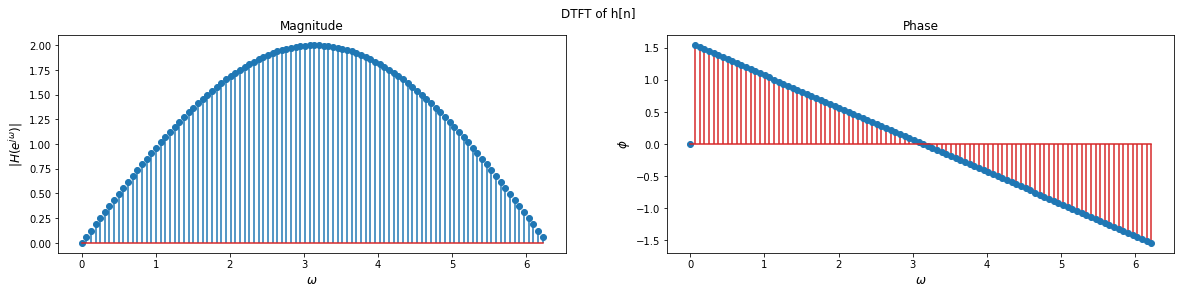

In [9]:
hd = np.array([1,-1,0,0])
nd = np.arange(len(hd))
impulse_plot(nd,hd,prop=False)
impulse_grd(nd,hd)

Group delay here is 0.5, hence the signal shift can not clearly be seen.